In [ ]:
!pip install opendatasets -q

In [ ]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/adarshrouniyar/air-pollution-image-dataset-from-india-and-nepal/data/code")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: beantsran
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/adarshrouniyar/air-pollution-image-dataset-from-india-and-nepal


100%|██████████| 636M/636M [00:03<00:00, 202MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/air-pollution-image-dataset-from-india-and-nepal/Dataset_for_AQI_Classification/Dataset_for_AQI_Classification/train_data.csv')
df_train

Location                                Filename  Year  \
0                  Tamil Nadu         TN_UnFSG_2023-03-02-08.30-1.jpg  2023   
1                   Bengaluru    BENGR_Mod_2023-02-24-08.30-1-166.jpg  2023   
2           Biratnagar, Nepal  BIR_UNFSG_VF_2023-02-03-15.00-2-24.jpg  2023   
3                      Mumbai      MH_UnFSG_2023-03-10-16.00-1-76.jpg  2023   
4                  ITO, Delhi        DEL_SEV_2023-02-07-14.00-2-8.jpg  2023   
...                       ...                                     ...   ...   
7828        Biratnagar, Nepal           BRI_Un_2023-02-09-08.00-1.jpg  2023   
7829               ITO, Delhi       DEL_SEV_2023-02-17-13.00-2-25.jpg  2023   
7830  New Ind Town, Faridabad     HAR_VUN_2022-10-02-10.00-1-1489.jpg  2022   
7831                   Mumbai     MH_UnFSG_2023-03-14-13.00-1-385.jpg  2023   
7832                   Mumbai         MH_UH_2023-02-11-03.30-2-41.jpg  2023   

      Month  Day   Hour  AQI   PM2.5    PM10      O3      CO    SO2     NO2  \
0         3    2   8:30  119   69.00  106.00    8.00  358.00  22.00   26.00   
1         2   24   8:30   68   32.00   61.00   26.00  228.00   5.00   21.00   
2         2    3  15:00  141   47.96   68.92   65.57    0.41   2.80    2.51   
3         3   10  16:00  141   72.00  108.00     NaN     NaN    NaN   63.00   
4         2    7  14:00  449  337.00  198.00   23.00   24.00  13.00   57.00   
...     ...  ...    ...  ...     ...     ...     ...     ...    ...     ...   
7828      2    9   8:00  171  112.46  163.45   31.17    0.96   3.84   18.78   
7829      2   17  13:00  372  348.00  199.00   25.00   67.00  10.00  107.00   
7830     10    2  10:00  230  185.00  199.00   10.00   52.00  12.00   26.00   
7831      3   14  13:00  138   90.00  120.00  143.00   21.00   9.00   16.00   
7832      2   11  15:30  154   66.20   93.75   91.00   20.00    NaN   98.00   

                             AQI_Class  
0     c_Unhealthy_for_Sensitive_Groups  
1                           b_Moderate  
2     c_Unhealthy_for_Sensitive_Groups  
3     c_Unhealthy_for_Sensitive_Groups  
4                             f_Severe  
...                                ...  
7828                       d_Unhealthy  
7829                          f_Severe  
7830                  e_Very_Unhealthy  
7831  c_Unhealthy_for_Sensitive_Groups  
7832                       d_Unhealthy  

[7833 rows x 14 columns]

<Axes: title={'center': 'Distribution of training dataset'}, xlabel='AQI_Class', ylabel='count'>

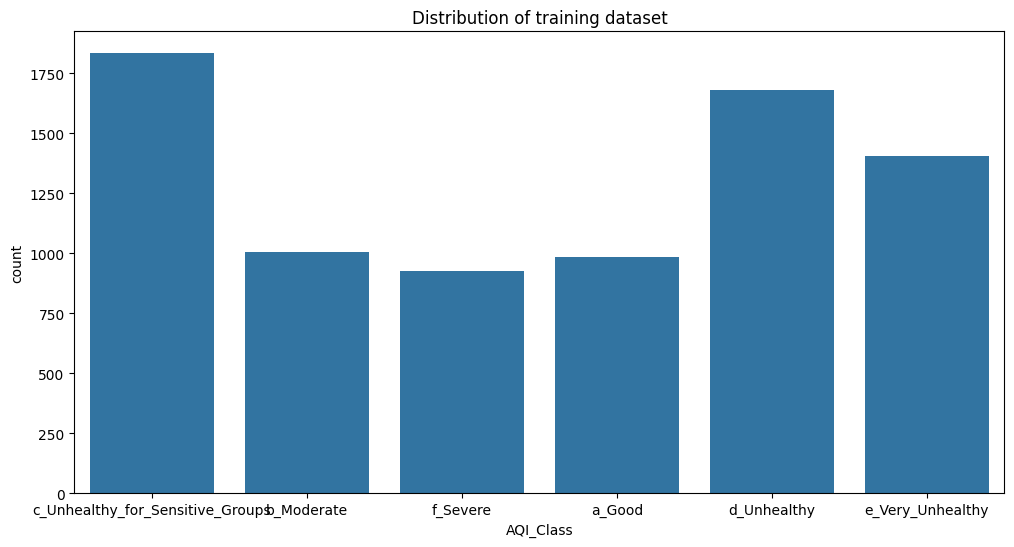

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Distribution of training dataset")
sns.countplot(data=df_train, x="AQI_Class")

/tmp/ipython-input-959370400.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x="Modified_AQI_Class", palette='rocket')


<Axes: title={'center': 'Distribution of training dataset'}, xlabel='Modified_AQI_Class', ylabel='count'>

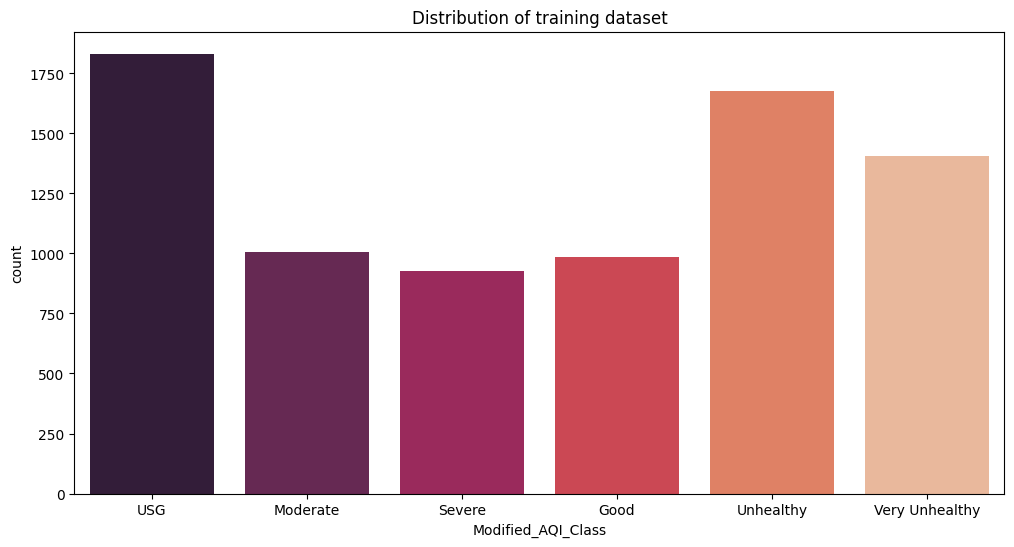

In [ ]:
mapp_train = {
    'a_Good': 'Good',
    'b_Moderate': 'Moderate',
    'c_Unhealthy_for_Sensitive_Groups': 'USG',
    'd_Unhealthy' : 'Unhealthy',
    'e_Very_Unhealthy' : 'Very Unhealthy',
    'f_Severe' : 'Severe'
}
df_train['Modified_AQI_Class'] = df_train['AQI_Class'].map(mapp_train)
plt.figure(figsize=(12,6))
plt.title("Distribution of training dataset")
sns.countplot(data=df_train, x="Modified_AQI_Class", palette='rocket')

In [ ]:
df_val = pd.read_csv('/content/air-pollution-image-dataset-from-india-and-nepal/Dataset_for_AQI_Classification/Dataset_for_AQI_Classification/val_data.csv')
df_val

Location                              Filename  Year  \
0                   Bengaluru  BENGR_Mod_2023-02-23-08.30-1-401.jpg  2023   
1                  ITO, Delhi    DEL_SEV_2023-02-22-14.00-2-221.jpg  2023   
2     New Ind Town, Faridabad   HAR_VUN_2022-10-02-10.00-1-2361.jpg  2022   
3                  ITO, Delhi     DEL_VUnH_2023-02-16-14.00-2-7.jpg  2023   
4                      Mumbai        MH_Good_2023-03-23-17.00-2.jpg  2023   
...                       ...                                   ...   ...   
1954               ITO, Delhi    DEL_SEV_2023-02-07-14.00-1-103.jpg  2023   
1955               ITO, Delhi    DEL_SEV_2023-02-20-14.00-2-156.jpg  2023   
1956               ITO, Delhi     DEL_SEV_2023-02-22-14.00-2-96.jpg  2023   
1957        Biratnagar, Nepal  BIR_UNH_VF_2023-02-02- 1700-3-72.jpg  2023   
1958                   Mumbai       MH_UN_2023-03-15-15.00-1-15.jpg  2023   

      Month  Day   Hour  AQI   PM2.5    PM10      O3      CO    SO2    NO2  \
0         2   23   8:30   97   43.00   78.00   26.00  258.00  10.00  17.00   
1         2   22  14:00  450  500.00  480.00   91.00   78.00  17.00  47.00   
2        10    2  10:00  230  185.00  199.00   10.00   52.00  12.00  26.00   
3         2   16  14:00  268  401.00  325.00   73.00   88.00  16.00    NaN   
4         3   23  17:00   47   14.00   41.00   35.00    6.00   5.00   7.00   
...     ...  ...    ...  ...     ...     ...     ...     ...    ...    ...   
1954      2    7  14:00  449  337.00  198.00   23.00   24.00  13.00  57.00   
1955      2   20  14:00  363  257.00  139.00   41.00   65.00  35.00  83.00   
1956      2   22  14:00  450  500.00  480.00   91.00   78.00  17.00  47.00   
1957      2    2  17:00  156   67.06   95.93   52.38    0.52   3.35   6.49   
1958      3   15  15:00  162  193.00  466.00  225.00   39.00   8.00  61.00   

             AQI_Class  
0           b_Moderate  
1             f_Severe  
2     e_Very_Unhealthy  
3     e_Very_Unhealthy  
4               a_Good  
...                ...  
1954          f_Severe  
1955          f_Severe  
1956          f_Severe  
1957       d_Unhealthy  
1958       d_Unhealthy  

[1959 rows x 14 columns]

/tmp/ipython-input-3973077753.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_val, x="Modified_AQI_Class", palette='rocket')


<Axes: title={'center': 'Distribution of training dataset'}, xlabel='Modified_AQI_Class', ylabel='count'>

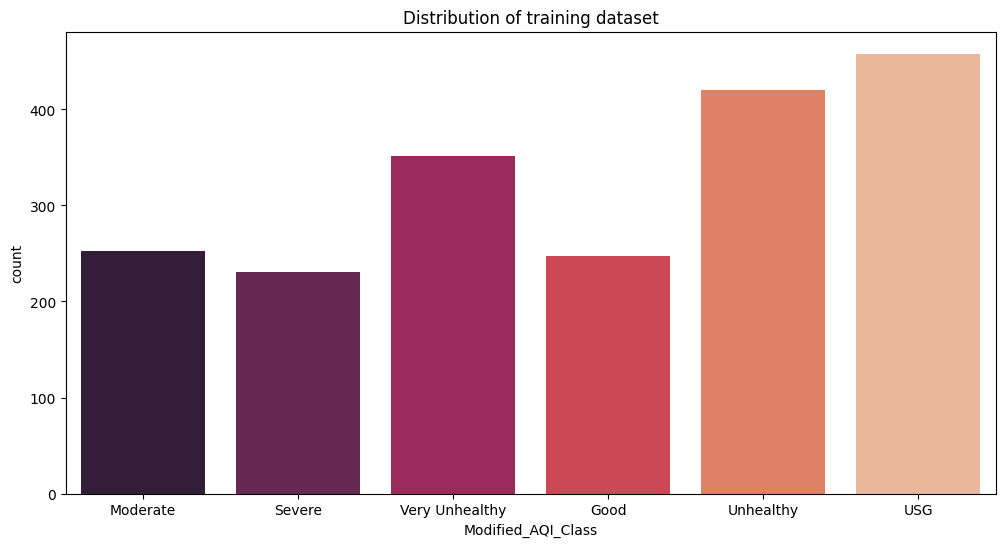

In [ ]:
mapp_val = {
    'a_Good': 'Good',
    'b_Moderate': 'Moderate',
    'c_Unhealthy_for_Sensitive_Groups': 'USG',
    'd_Unhealthy' : 'Unhealthy',
    'e_Very_Unhealthy' : 'Very Unhealthy',
    'f_Severe' : 'Severe'
}
df_val['Modified_AQI_Class'] = df_val['AQI_Class'].map(mapp_train)
plt.figure(figsize=(12,6))
plt.title("Distribution of training dataset")
sns.countplot(data=df_val, x="Modified_AQI_Class", palette='rocket')

In [ ]:
df_test = pd.read_csv('/content/air-pollution-image-dataset-from-india-and-nepal/Dataset_for_AQI_Classification/Dataset_for_AQI_Classification/testing_data.csv')
df_test

Location                               Filename  Year  Month  \
0     Biratnagar, Nepal         BRI_Un_2023-02-02- 12.00-9.jpg  2023      2   
1     Biratnagar, Nepal  BIR_UNH_VF_2023-02-02- 12.00-3-72.jpg  2023      2   
2     Biratnagar, Nepal  BIR_UNH_VF_2023-02-02- 12.00-3-71.jpg  2023      2   
3     Biratnagar, Nepal  BIR_UNH_VF_2023-02-02- 12.00-3-65.jpg  2023      2   
4     Biratnagar, Nepal  BIR_UNH_VF_2023-02-02- 12.00-3-56.jpg  2023      2   
...                 ...                                    ...   ...    ...   
2443  Dimapur, Nagaland  Dimapur_MOD_2023-02-10-08.30-2-63.jpg  2023      2   
2444  Dimapur, Nagaland  Dimapur_MOD_2023-02-10-08.30-2-66.jpg  2023      2   
2445  Dimapur, Nagaland  Dimapur_MOD_2023-02-10-08.30-2-74.jpg  2023      2   
2446  Dimapur, Nagaland  Dimapur_MOD_2023-02-10-08.30-2-77.jpg  2023      2   
2447  Dimapur, Nagaland   Dimapur_MOD_2023-02-10-08.30-2-8.jpg  2023      2   

      Day   Hour  AQI  PM2.5    PM10     O3    CO  SO2   NO2    AQI_Class  
0       2  12:00  158  70.08  100.82  58.89  0.49  4.4  1.04  d_Unhealthy  
1       2  12:00  158  70.08  100.82  58.89  0.49  4.4  1.04  d_Unhealthy  
2       2  12:00  158  70.08  100.82  58.89  0.49  4.4  1.04  d_Unhealthy  
3       2  12:00  158  70.08  100.82  58.89  0.49  4.4  1.04  d_Unhealthy  
4       2  12:00  158  70.08  100.82  58.89  0.49  4.4  1.04  d_Unhealthy  
...   ...    ...  ...    ...     ...    ...   ...  ...   ...          ...  
2443   10   8:30   63  31.00   52.00  10.00  6.00  4.0  2.00   b_Moderate  
2444   10   8:30   63  31.00   52.00  10.00  6.00  4.0  2.00   b_Moderate  
2445   10   8:30   63  31.00   52.00  10.00  6.00  4.0  2.00   b_Moderate  
2446   10   8:30   63  31.00   52.00  10.00  6.00  4.0  2.00   b_Moderate  
2447   10   8:30   63  31.00   52.00  10.00  6.00  4.0  2.00   b_Moderate  

[2448 rows x 14 columns]

/tmp/ipython-input-612421471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_test, x="Modified_AQI_Class", palette='rocket')


<Axes: title={'center': 'Distribution of training dataset'}, xlabel='Modified_AQI_Class', ylabel='count'>

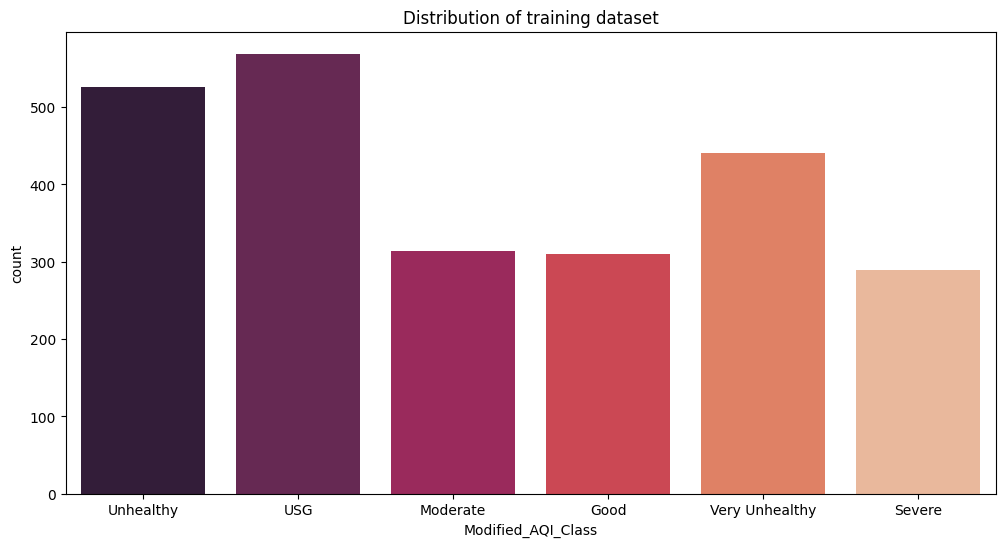

In [ ]:
mapp_test = {
    'a_Good': 'Good',
    'b_Moderate': 'Moderate',
    'c_Unhealthy_for_Sensitive_Groups': 'USG',
    'd_Unhealthy' : 'Unhealthy',
    'e_Very_Unhealthy' : 'Very Unhealthy',
    'f_Severe' : 'Severe'
}
df_test['Modified_AQI_Class'] = df_test['AQI_Class'].map(mapp_train)
plt.figure(figsize=(12,6))
plt.title("Distribution of training dataset")
sns.countplot(data=df_test, x="Modified_AQI_Class", palette='rocket')

In [ ]:
df_india_nepal = pd.read_csv('/content/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_Nep_AQI_Dataset.csv')
df_india_nepal

Location                               Filename  Year  Month  \
0      Biratnagar, Nepal         BRI_Un_2023-02-02- 12.00-9.jpg  2023      2   
1      Biratnagar, Nepal         BRI_Un_2023-02-02- 12.00-8.jpg  2023      2   
2      Biratnagar, Nepal         BRI_Un_2023-02-02- 12.00-7.jpg  2023      2   
3      Biratnagar, Nepal         BRI_Un_2023-02-02- 12.00-6.jpg  2023      2   
4      Biratnagar, Nepal         BRI_Un_2023-02-02- 12.00-5.jpg  2023      2   
...                  ...                                    ...   ...    ...   
12235  Dimapur, Nagaland  Dimapur_MOD_2023-02-10-08.30-2-77.jpg  2023      2   
12236  Dimapur, Nagaland   Dimapur_MOD_2023-02-10-08.30-2-8.jpg  2023      2   
12237  Dimapur, Nagaland   Dimapur_MOD_2023-02-10-08.30-2-9.jpg  2023      2   
12238  Dimapur, Nagaland     Dimapur_MOD_2023-02-10-08.30-3.jpg  2023      2   
12239  Dimapur, Nagaland     Dimapur_MOD_2023-02-10-08.30-4.jpg  2023      2   

       Day   Hour  AQI  PM2.5    PM10     O3    CO  SO2   NO2    AQI_Class  
0        2  12:00  158  70.08  100.82  58.89  0.49  4.4  1.04  d_Unhealthy  
1        2  12:00  158  70.08  100.82  58.89  0.49  4.4  1.04  d_Unhealthy  
2        2  12:00  158  70.08  100.82  58.89  0.49  4.4  1.04  d_Unhealthy  
3        2  12:00  158  70.08  100.82  58.89  0.49  4.4  1.04  d_Unhealthy  
4        2  12:00  158  70.08  100.82  58.89  0.49  4.4  1.04  d_Unhealthy  
...    ...    ...  ...    ...     ...    ...   ...  ...   ...          ...  
12235   10   8:30   63  31.00   52.00  10.00  6.00  4.0  2.00   b_Moderate  
12236   10   8:30   63  31.00   52.00  10.00  6.00  4.0  2.00   b_Moderate  
12237   10   8:30   63  31.00   52.00  10.00  6.00  4.0  2.00   b_Moderate  
12238   10   8:30   63  31.00   52.00  10.00  6.00  4.0  2.00   b_Moderate  
12239   10   8:30   63  31.00   52.00  10.00  6.00  4.0  2.00   b_Moderate  

[12240 rows x 14 columns]

In [ ]:
image_root = '/content/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP'


In [ ]:
aqi_folders = {
    'a_Good': 'Good',
    'b_Moderate': 'Moderate',
    'c_Unhealthy_for_Sensitive_Groups': 'USG',
    'd_Unhealthy': 'Unhealthy',
    'e_Very_Unhealthy': 'Very Unhealthy',
    'f_Severe': 'Severe'
}

In [ ]:
import os

data = []
for folder_name, label in aqi_folders.items():
    folder_path = os.path.join(image_root, folder_name)
    if os.path.exists(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(folder_path, img_file)
                data.append({'filepath': img_path, 'AQI_Class': folder_name, 'Readable_Label': label})

df = pd.DataFrame(data)
print(df.head())



                                            filepath AQI_Class Readable_Label
0  /content/air-pollution-image-dataset-from-indi...    a_Good           Good
1  /content/air-pollution-image-dataset-from-indi...    a_Good           Good
2  /content/air-pollution-image-dataset-from-indi...    a_Good           Good
3  /content/air-pollution-image-dataset-from-indi...    a_Good           Good
4  /content/air-pollution-image-dataset-from-indi...    a_Good           Good


In [ ]:
df['Readable_Label'] = df['AQI_Class'].map(aqi_folders)

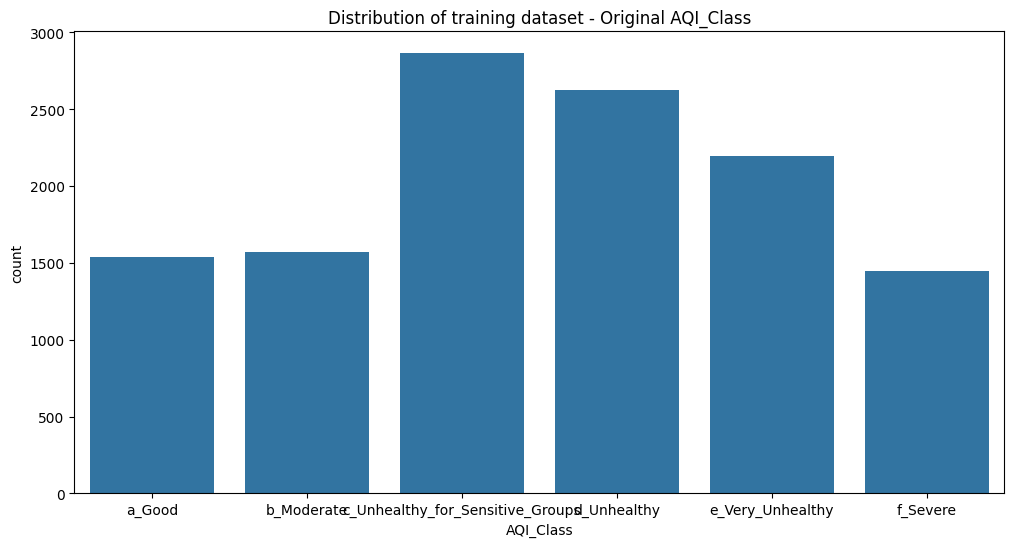

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Distribution of training dataset - Original AQI_Class")
sns.countplot(data=df, x='AQI_Class')
plt.show()

/tmp/ipython-input-3127304857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Readable_Label', palette='rocket')


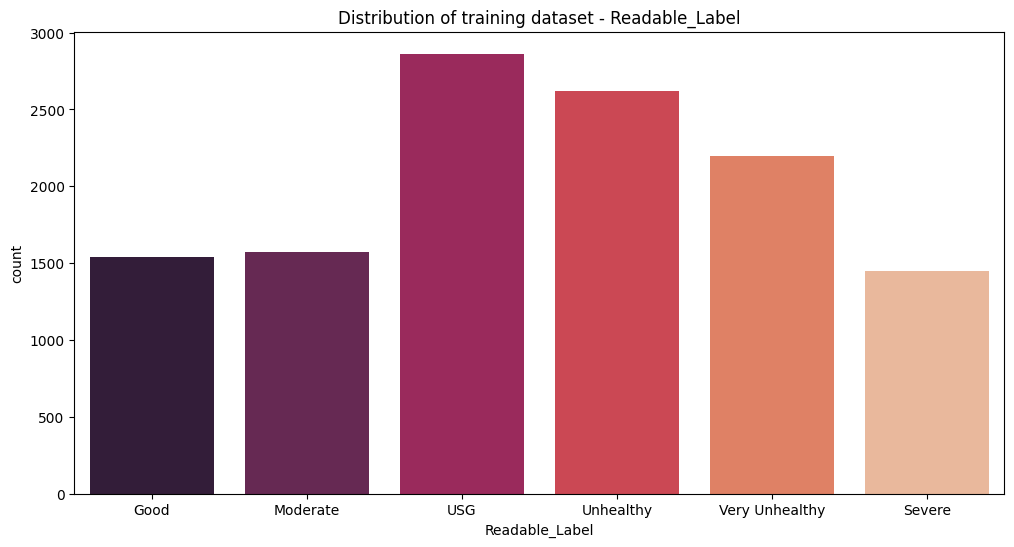

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Distribution of training dataset - Readable_Label")
sns.countplot(data=df, x='Readable_Label', palette='rocket')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(
    df,
    test_size=0.3,  # 30% reserved for val + test
    stratify=df['Readable_Label'],
    random_state=42
)


In [ ]:
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,  # half of 30% => 15% for test and 15% for val
    stratify=temp_df['Readable_Label'],
    random_state=42
)


In [ ]:
print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")


Train set size: 8568
Validation set size: 1836
Test set size: 1836


In [ ]:
# Train/Validation/Test split
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['Readable_Label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['Readable_Label'], random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data generators
img_size = (128, 128)
batch_size = 32
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_flow = datagen.flow_from_dataframe(
    train_df, x_col='filepath', y_col='Readable_Label', target_size=img_size,
    class_mode='categorical', batch_size=batch_size, shuffle=True
)


Found 8568 validated image filenames belonging to 6 classes.


In [ ]:
val_flow = datagen.flow_from_dataframe(
    val_df, x_col='filepath', y_col='Readable_Label', target_size=img_size,
    class_mode='categorical', batch_size=batch_size, shuffle=False
)

Found 1836 validated image filenames belonging to 6 classes.


In [ ]:
test_flow = datagen.flow_from_dataframe(
    test_df, x_col='filepath', y_col='Readable_Label', target_size=img_size,
    class_mode='categorical', batch_size=batch_size, shuffle=False
)

Found 1836 validated image filenames belonging to 6 classes.


Build CNN Model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
num_classes = len(train_flow.class_indices)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(train_flow, validation_data=val_flow, epochs=15)

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


268/268 ━━━━━━━━━━━━━━━━━━━━ 132s 488ms/step - accuracy: 0.3355 - loss: 1.7253 - val_accuracy: 0.5937 - val_loss: 1.0363
Epoch 2/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 132s 491ms/step - accuracy: 0.5590 - loss: 1.0934 - val_accuracy: 0.6928 - val_loss: 0.7774
Epoch 3/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 138s 514ms/step - accuracy: 0.6848 - loss: 0.8011 - val_accuracy: 0.7778 - val_loss: 0.6157
Epoch 4/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 136s 506ms/step - accuracy: 0.7404 - loss: 0.6532 - val_accuracy: 0.8094 - val_loss: 0.5144
Epoch 5/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 129s 483ms/step - accuracy: 0.7916 - loss: 0.5497 - val_accuracy: 0.8350 - val_loss: 0.4447
Epoch 6/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 132s 492ms/step - accuracy: 0.8131 - loss: 0.4796 - val_accuracy: 0.8459 - val_loss: 0.4154
Epoch 7/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 134s 500ms/step - accuracy: 0.8385 - loss: 0.4230 - val_accuracy: 0.8480 - val_loss: 0.4209
Epoch 8/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 133s 495ms/step - accuracy: 0.8636 - loss: 0.34

In [ ]:
test_loss, test_acc = model.evaluate(test_flow)
print(f'Test Accuracy: {test_acc:.2f}')

58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.8708 - loss: 0.4643
Test Accuracy: 0.88


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict class probabilities
y_pred_probs = model.predict(test_flow)
# Pick the class with highest probability
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true class indices from generator
y_true = test_flow.classes

# Get class labels list for reporting and plotting
class_labels = list(test_flow.class_indices.keys())


58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step


In [ ]:
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


                precision    recall  f1-score   support

          Good       0.81      0.85      0.83       231
      Moderate       0.79      0.90      0.84       236
        Severe       0.99      0.90      0.94       217
           USG       0.89      0.81      0.85       430
     Unhealthy       0.92      0.91      0.91       393
Very Unhealthy       0.88      0.92      0.90       329

      accuracy                           0.88      1836
     macro avg       0.88      0.88      0.88      1836
  weighted avg       0.88      0.88      0.88      1836



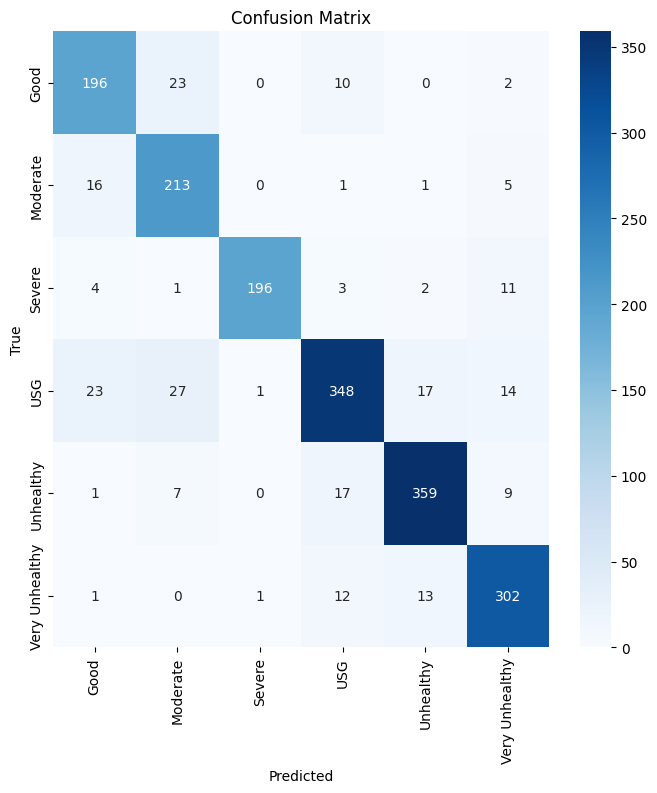

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

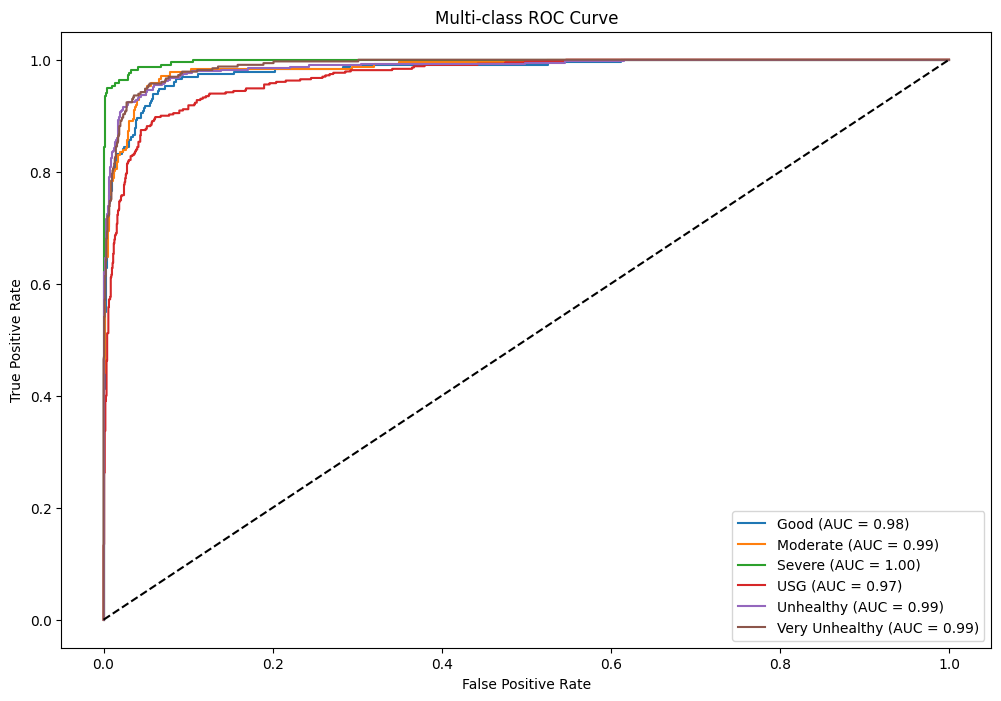

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

#ROC Curve for multi-class
y_true_bin = label_binarize(y_true, classes=range(num_classes))
plt.figure(figsize=(12, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
test_gen = datagen.flow_from_dataframe(
    test_df,
    x_col='filepath',
    y_col='Readable_Label',
    target_size=img_size,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

y_pred_probs = model.predict(test_gen)


Found 1836 validated image filenames belonging to 6 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step


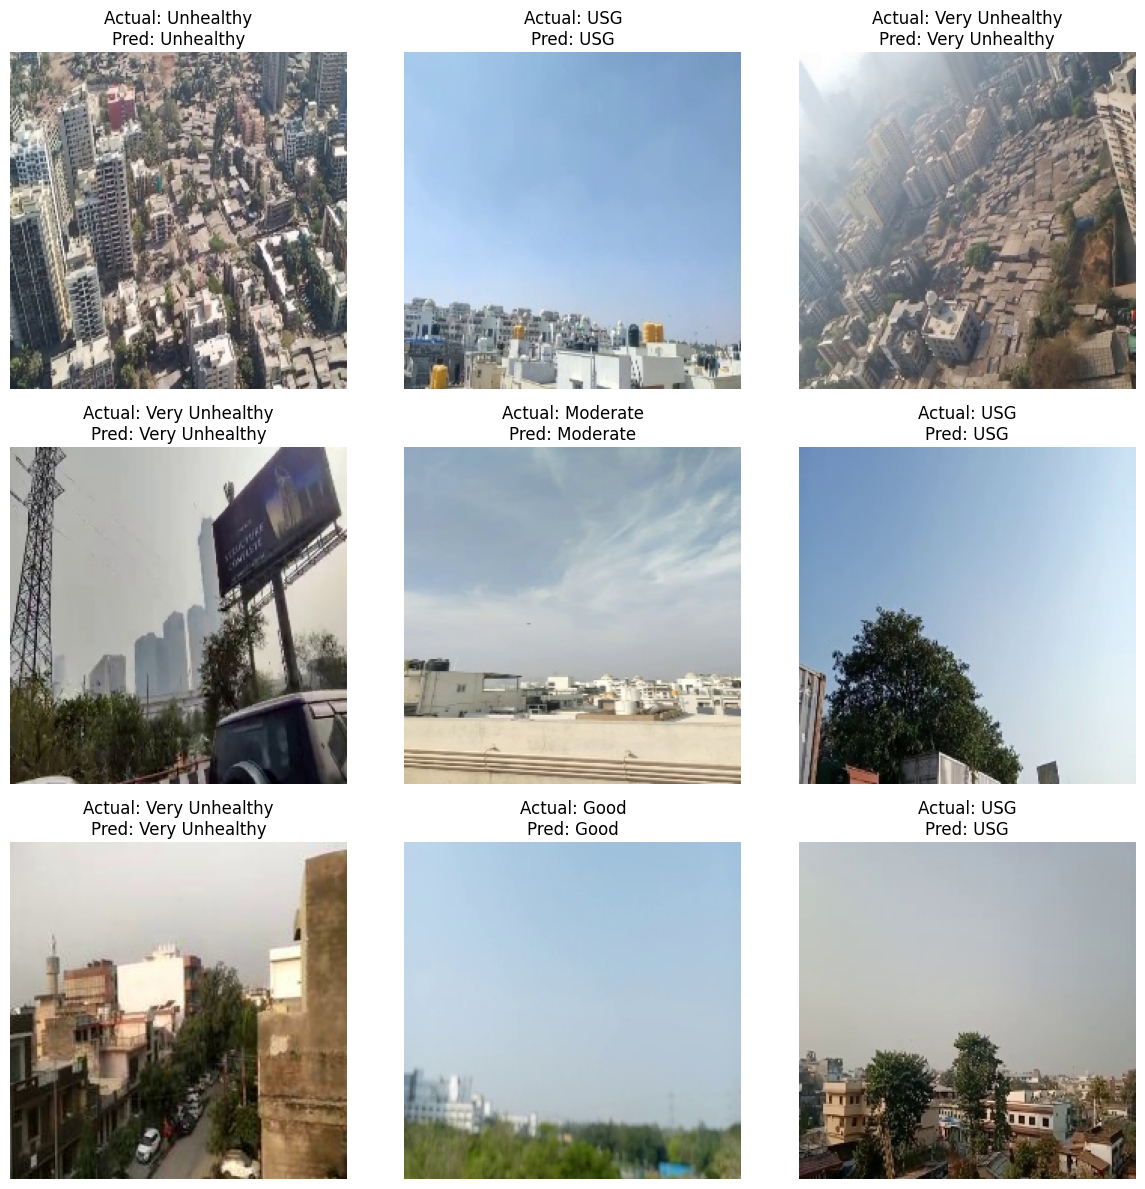

In [ ]:
#Visualize sample predictions
import random
plt.figure(figsize=(12, 12))
indices = random.sample(range(len(test_gen.filenames)), 9)
for i, idx in enumerate(indices):
    img_path = test_gen.filepaths[idx]
    img = plt.imread(img_path)
    actual_label = class_labels[test_gen.classes[idx]]
    pred_label = class_labels[y_pred[idx]]

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(f'Actual: {actual_label}\nPred: {pred_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


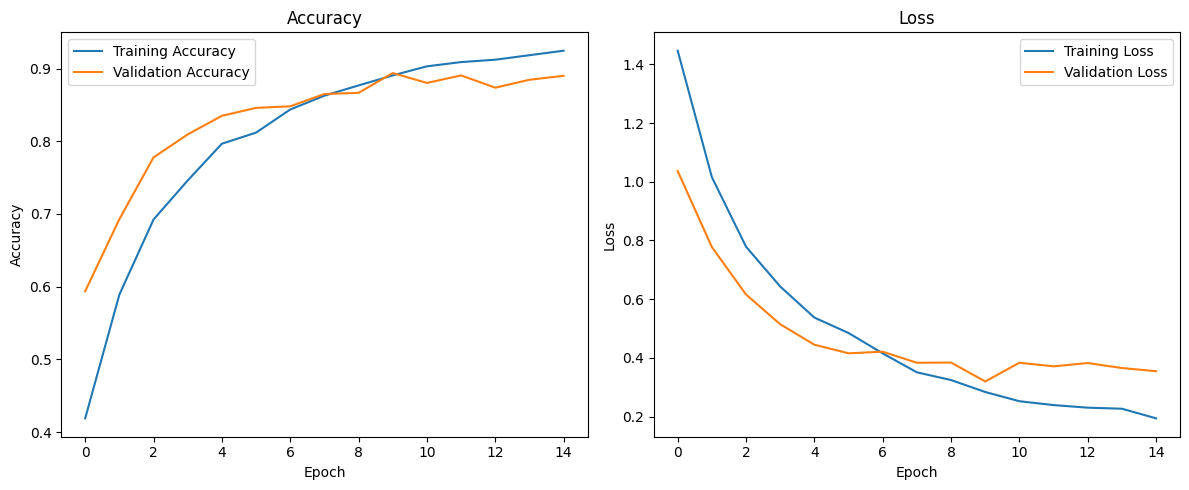

In [ ]:
# Plot training & validation accuracy + loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Build ResNet50 Model

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt


image_root = '/content/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP'

img_size = (224, 224)
batch_size = 32
num_classes = 6
class_labels = ['Good', 'Moderate', 'USG', 'Unhealthy', 'Very Unhealthy', 'Severe']

#use keras library for converting images into numpy array

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.3)
train_gen = datagen.flow_from_directory(
    image_root,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)



Found 8571 images belonging to 6 classes.


In [ ]:
val_gen = datagen.flow_from_directory(
    image_root,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 3669 images belonging to 6 classes.


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model.trainable = False  # Freeze base

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.5), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

Epoch 1/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1390s 5s/step - accuracy: 0.6458 - loss: 70.0233 - val_accuracy: 0.4077 - val_loss: 148.5114
Epoch 2/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1356s 5s/step - accuracy: 0.8760 - loss: 12.5029 - val_accuracy: 0.3729 - val_loss: 187.1505
Epoch 3/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1352s 5s/step - accuracy: 0.9179 - loss: 10.1156 - val_accuracy: 0.4633 - val_loss: 170.6589
Epoch 4/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1337s 5s/step - accuracy: 0.9299 - loss: 9.6148 - val_accuracy: 0.4854 - val_loss: 232.6921
Epoch 5/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1337s 5s/step - accuracy: 0.9501 - loss: 6.7157 - val_accuracy: 0.4745 - val_loss: 187.0100
Epoch 6/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1376s 5s/step - accuracy: 0.9612 - loss: 4.4571 - val_accuracy: 0.4331 - val_loss: 354.5245
Epoch 7/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1378s 5s/step - accuracy: 0.9456 - loss: 8.2664 - val_accuracy: 0.4563 - val_loss: 290.4462
Epoch 8/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1342s 5s/step - accuracy: 0.9692 

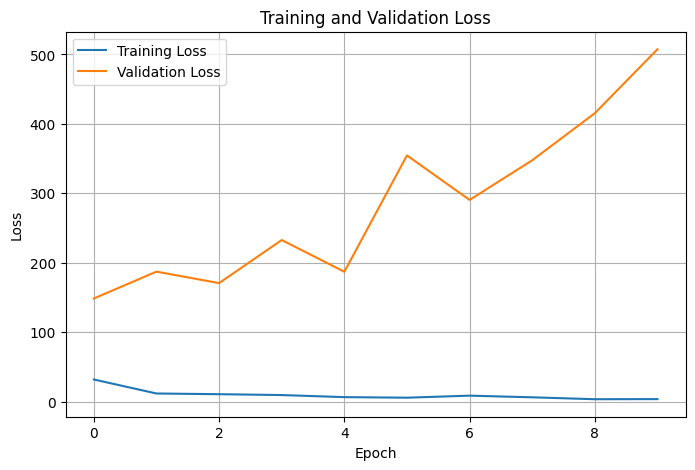

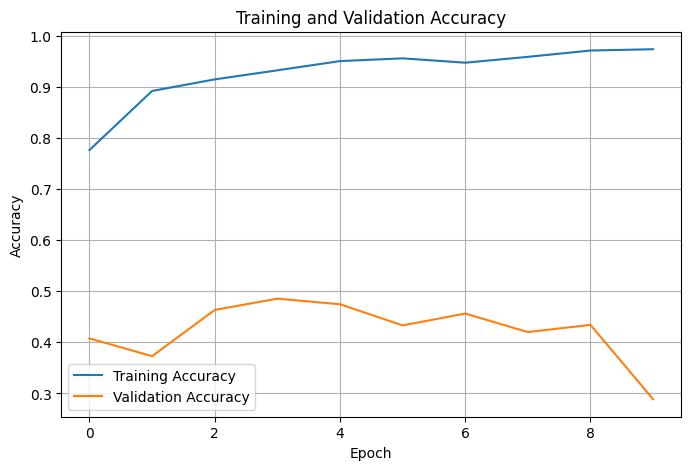

In [ ]:
import matplotlib.pyplot as plt

# 1) Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2) Plot training & validation accuracy (or 'accuracy'/'val_accuracy')
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
weights_filename = 'resnet_aqi.weights.h5'


In [ ]:
model.save_weights(weights_filename)


In [ ]:
model.load_weights(weights_filename)


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model.trainable = False
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights(weights_filename)
print("Loaded model weights for prediction.")

Loaded model weights for prediction.


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
pollution_percentage_map = {
    'Good': 10,
    'Moderate': 30,
    'USG': 50,
    'Unhealthy': 70,
    'Very Unhealthy': 90,
    'Severe': 100
}

In [ ]:
def predict_and_show(model, image_root, class_labels, num_images=20):
    image_paths = []
    for root, dirs, files in os.walk(image_root):
        for f in files:
            if f.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(root, f))

    if len(image_paths) == 0:
        print(f"No images found in the folder: {image_root}")
        return

    sample_images = random.sample(image_paths, min(num_images, len(image_paths)))
    plt.figure(figsize=(20, 20))

    for i, img_path in enumerate(sample_images):
        img = keras_image.load_img(img_path, target_size=(224, 224))
        x = keras_image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        preds = model.predict(x, verbose=0)
        if preds is None or len(preds) == 0:
            pred_label = "Unknown"
            pollution_pct = 0
        else:
            pred_idx = np.argmax(preds, axis=1)[0]
            pred_label = class_labels[pred_idx]
            pollution_pct = pollution_percentage_map.get(pred_label, 0)

        plt.subplot(5, 4, i + 1)
        plt.imshow(img)
        plt.title(f'Pollution: {pollution_pct}%\nClass: {pred_label}', fontsize=20, color='black')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


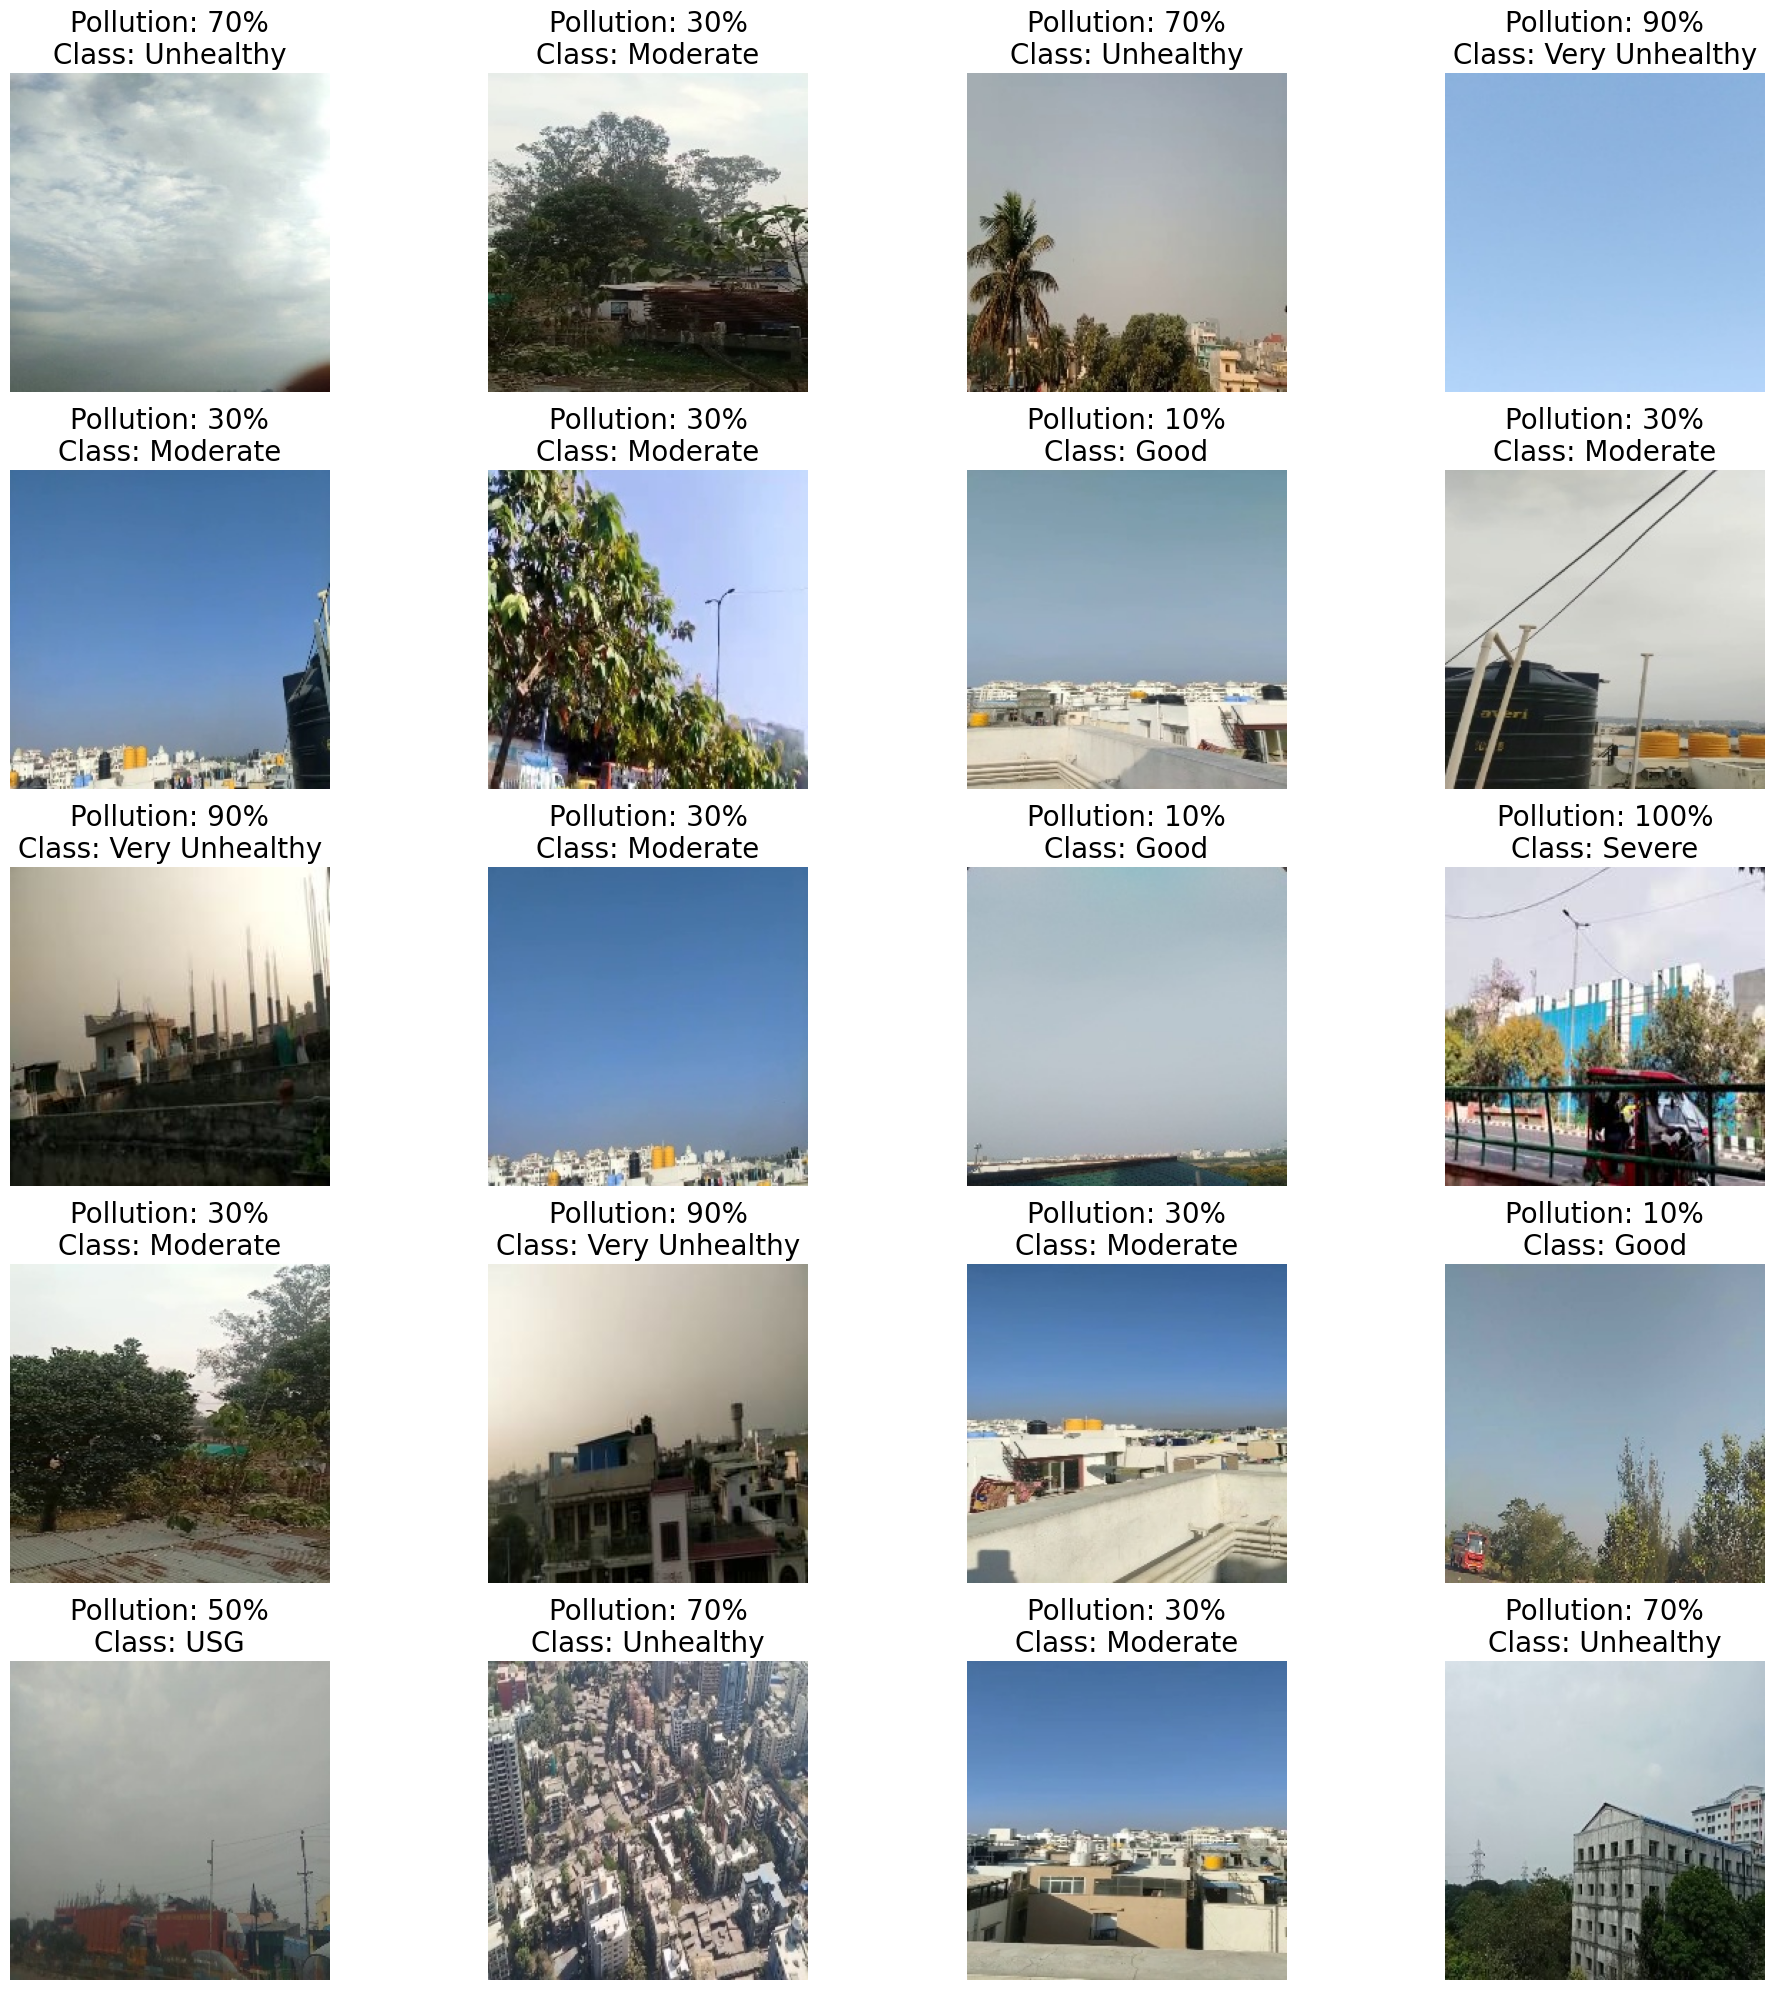

In [ ]:
from tensorflow.keras.preprocessing import image as keras_image
predict_and_show(model, image_root, class_labels)

**Build GoogleNet(Inception V3) Model**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define constants
img_size = (299, 299)  # InceptionV3 requires 299x299
batch_size = 32
num_classes = 6
class_labels = ['Good', 'Moderate', 'USG', 'Unhealthy', 'Very Unhealthy', 'Severe']

In [ ]:
# Data generator with preprocessing
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.3)

train_gen = datagen.flow_from_directory(
    image_root,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    image_root,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 8571 images belonging to 6 classes.
Found 3669 images belonging to 6 classes.


In [ ]:
# Load InceptionV3 base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model.trainable = False  # Freeze base

x = GlobalAveragePooling2D()(base_model.output)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train model
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

Epoch 1/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1835s 7s/step - accuracy: 0.5352 - loss: 1.2129 - val_accuracy: 0.3096 - val_loss: 1.8442
Epoch 2/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1863s 7s/step - accuracy: 0.8056 - loss: 0.5932 - val_accuracy: 0.3249 - val_loss: 1.8704
Epoch 3/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1864s 7s/step - accuracy: 0.8586 - loss: 0.4473 - val_accuracy: 0.3440 - val_loss: 1.9272
Epoch 4/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1847s 7s/step - accuracy: 0.8936 - loss: 0.3694 - val_accuracy: 0.3393 - val_loss: 2.0152
Epoch 5/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1841s 7s/step - accuracy: 0.9127 - loss: 0.3184 - val_accuracy: 0.3314 - val_loss: 2.1410
Epoch 6/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1848s 7s/step - accuracy: 0.9271 - loss: 0.2810 - val_accuracy: 0.3707 - val_loss: 1.9957
Epoch 7/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1863s 7s/step - accuracy: 0.9432 - loss: 0.2433 - val_accuracy: 0.3579 - val_loss: 2.1530
Epoch 8/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1846s 7s/step - accuracy: 0.9453 - loss: 0.2205 - 

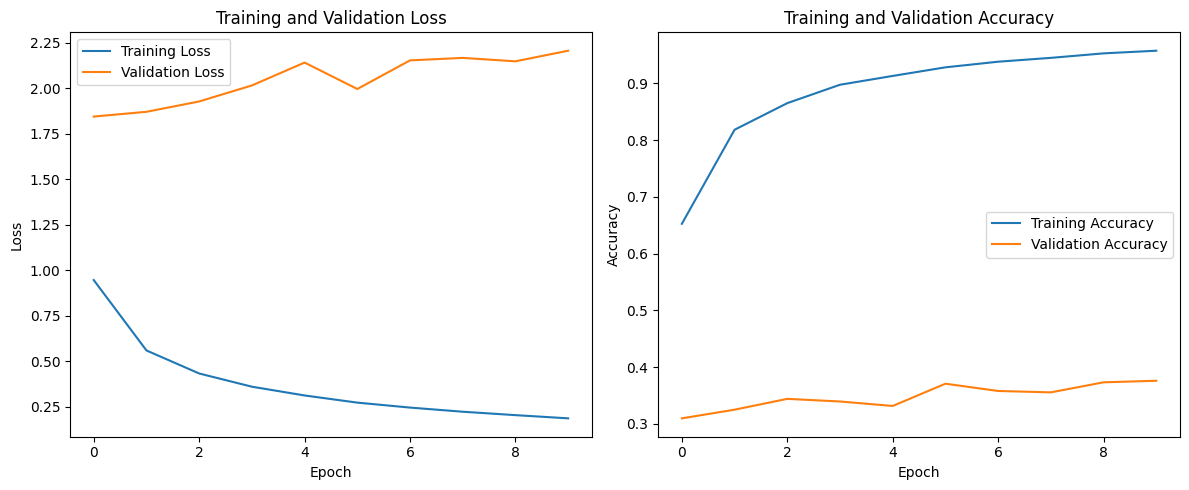

In [ ]:
# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

115/115 ━━━━━━━━━━━━━━━━━━━━ 576s 5s/step
InceptionV3 Classification Report:
                                  precision    recall  f1-score   support

                          a_Good       0.24      0.21      0.23       462
                      b_Moderate       0.32      0.78      0.45       471
c_Unhealthy_for_Sensitive_Groups       0.31      0.27      0.29       858
                     d_Unhealthy       0.58      0.51      0.54       786
                e_Very_Unhealthy       0.49      0.29      0.37       658
                        f_Severe       0.33      0.21      0.26       434

                        accuracy                           0.38      3669
                       macro avg       0.38      0.38      0.35      3669
                    weighted avg       0.39      0.38      0.37      3669



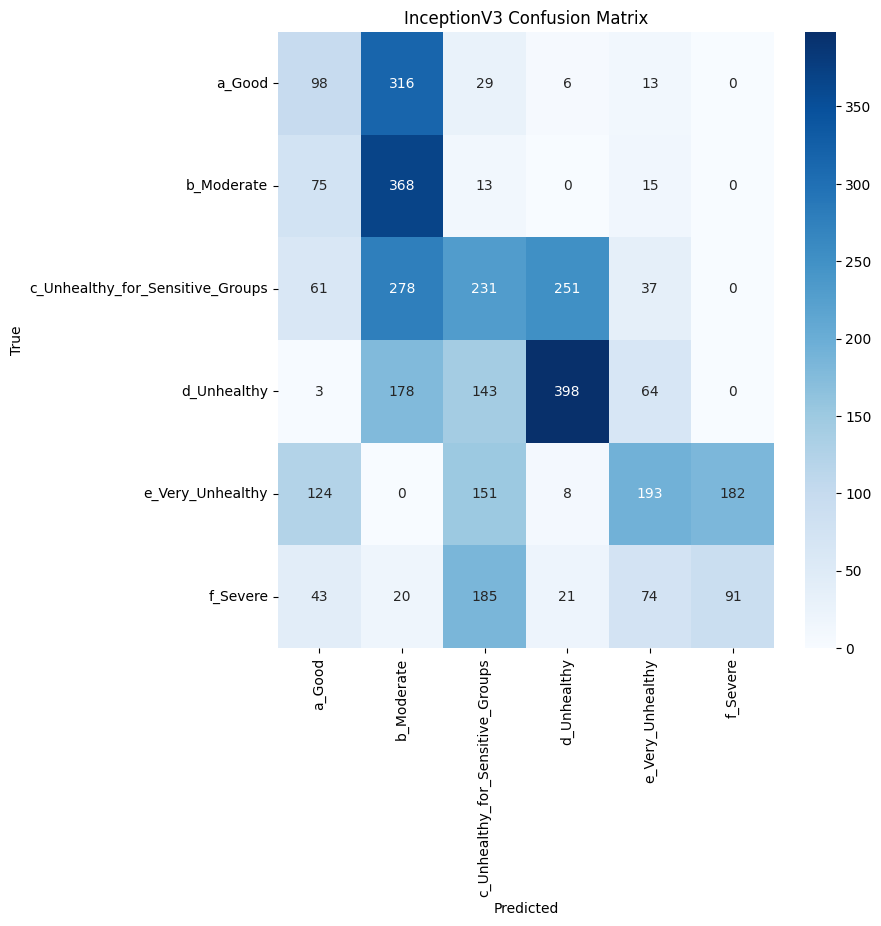

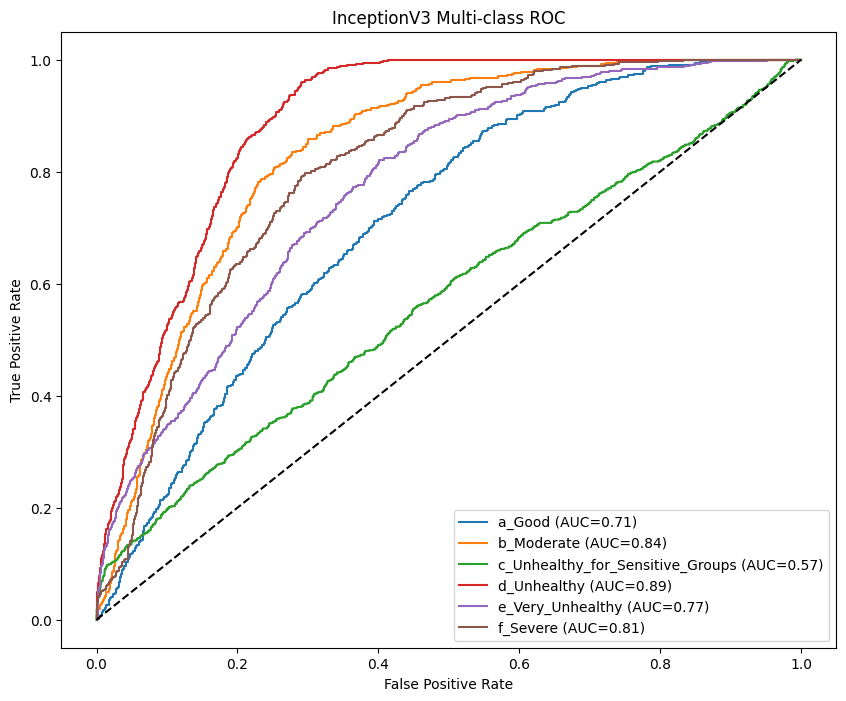

In [ ]:
val_gen.reset()
inc_probs = model.predict(val_gen)
inc_pred = np.argmax(inc_probs, axis=1)
inc_true = val_gen.classes
inc_class_labels = list(val_gen.class_indices.keys())

print("InceptionV3 Classification Report:")
print(classification_report(inc_true, inc_pred, target_names=inc_class_labels))

cm = confusion_matrix(inc_true, inc_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=inc_class_labels,
            yticklabels=inc_class_labels,
            cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('InceptionV3 Confusion Matrix')
plt.show()

y_true_bin_inc = label_binarize(inc_true, classes=range(num_classes))
plt.figure(figsize=(10,8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin_inc[:, i], inc_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{inc_class_labels[i]} (AUC={roc_auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('InceptionV3 Multi‑class ROC')
plt.legend(loc='lower right')
plt.show()

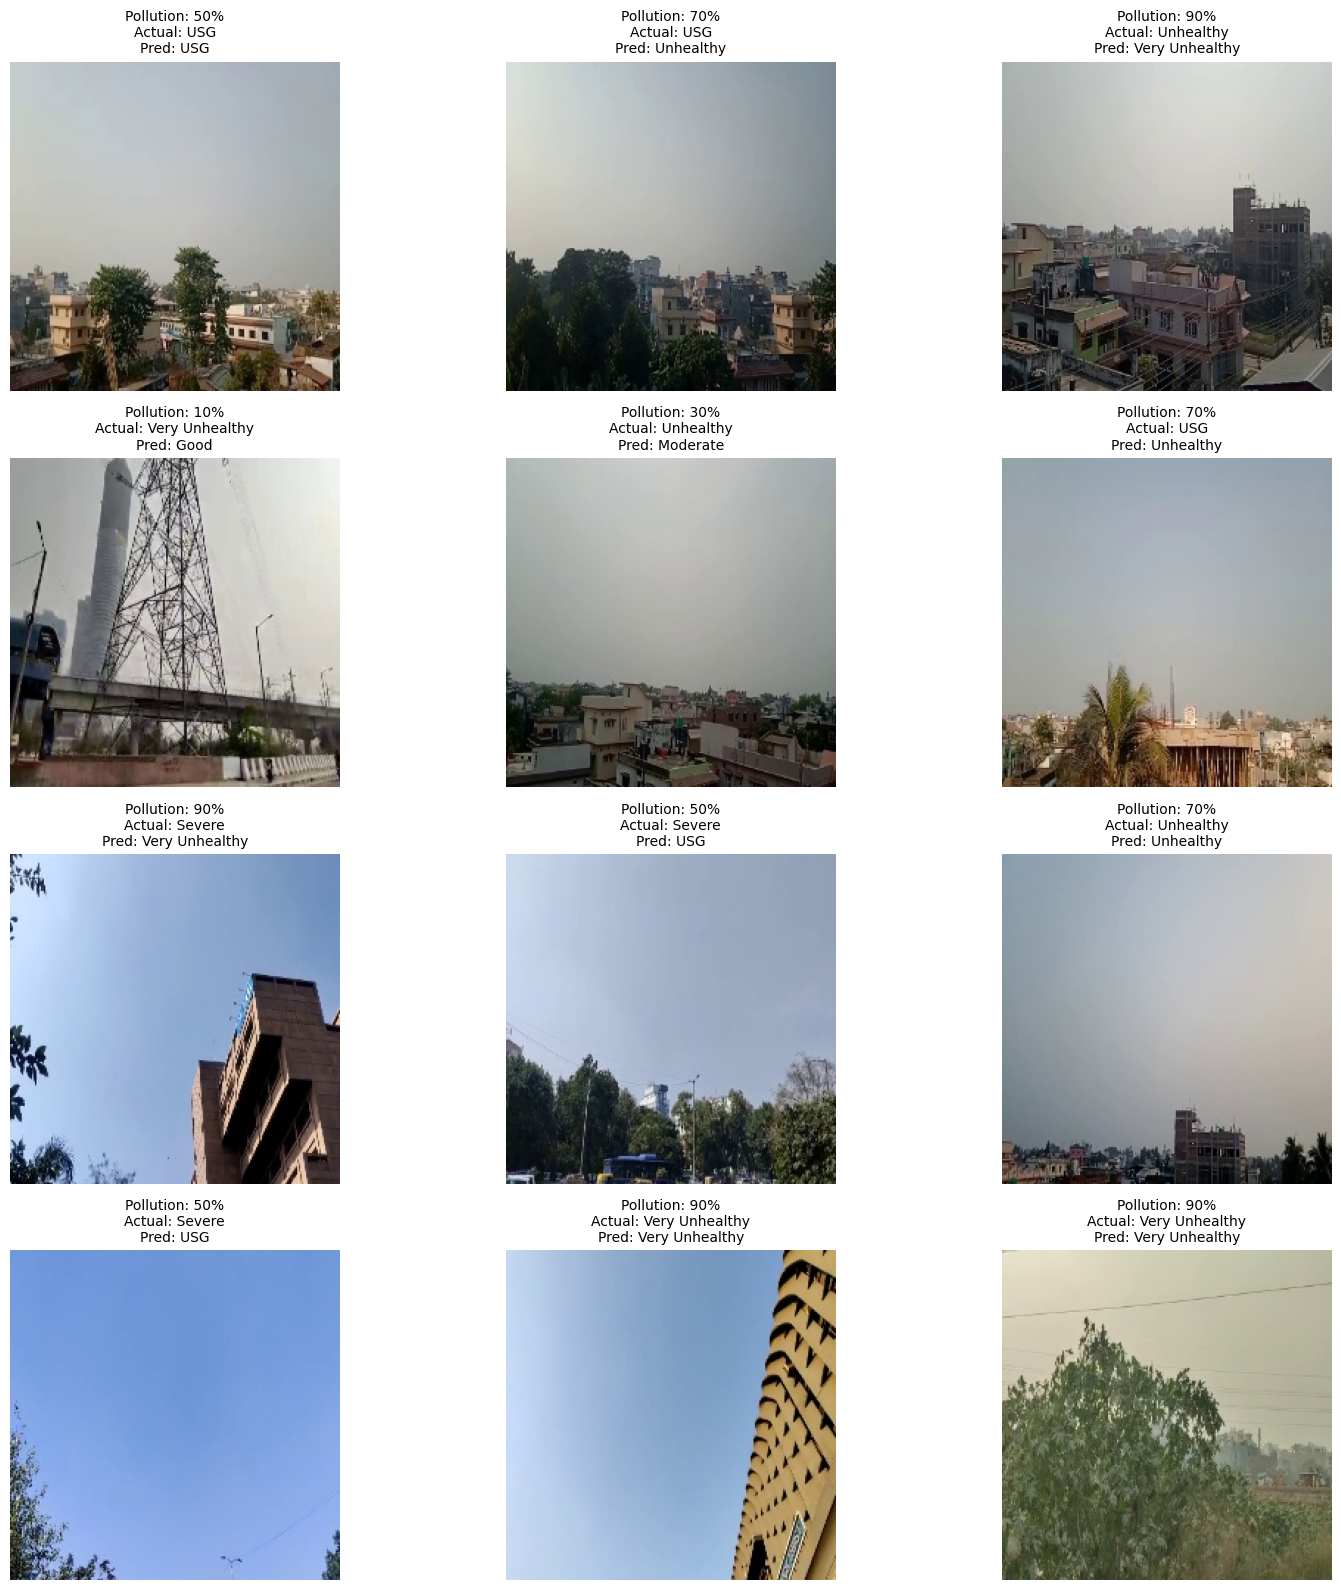

In [ ]:
inc_weights_file = 'inceptionv3_aqi.weights.h5'
# Assuming 'model' variable currently holds the InceptionV3 model
model.save_weights(inc_weights_file)

def predict_and_show_inception(model, gen, class_labels, num_images=12, img_size=(299, 299), preprocess_func=preprocess_input):
    indices = random.sample(range(len(gen.filenames)), num_images)
    plt.figure(figsize=(16,16))
    for i, idx in enumerate(indices):
        img_path = gen.filepaths[idx]
        img_raw = plt.imread(img_path)
        actual_label = class_labels[gen.classes[idx]]

        img = keras_image.load_img(img_path, target_size=img_size)
        x_arr = keras_image.img_to_array(img)
        x_arr = np.expand_dims(x_arr, axis=0)
        x_arr = preprocess_func(x_arr)

        preds = model.predict(x_arr, verbose=0)
        pred_idx = np.argmax(preds, axis=1)[0]
        pred_label = class_labels[pred_idx]
        pollution_pct = pollution_percentage_map.get(pred_label, 0)

        plt.subplot(4, 3, i+1)
        plt.imshow(img_raw)
        plt.title(f'Pollution: {pollution_pct}%\nActual: {actual_label}\nPred: {pred_label}',
                  fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function with correct variables for InceptionV3
predict_and_show_inception(model, val_gen, class_labels, img_size=img_size, preprocess_func=preprocess_input)

**Build VGG-16 Model**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


TRAIN_DIR = globals().get('image_root', None)
IMG_SIZE   = tuple(globals().get('img_size', (224,224)))
BATCH_SIZE = int(globals().get('batch_size', 32))
class_labels = globals().get('class_labels', None)

if TRAIN_DIR is None:
    raise RuntimeError("image_root not found. Please set image_root in your notebook to dataset directory.")

if class_labels is None:

    class_labels = sorted([d for d in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, d))])
    print("Inferred class_labels:", class_labels)

NUM_CLASSES = len(class_labels)
OUTPUT_DIR = "./vgg_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [ ]:
# ---------- Data generators ----------
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.12,
    height_shift_range=0.12,
    shear_range=0.12,
    zoom_range=0.12,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

In [ ]:
# ---------- Callbacks & hyperparams ----------
def make_callbacks(name):
    return [
        EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1),
        ModelCheckpoint(os.path.join(OUTPUT_DIR, f"{name}_best.h5"), monitor='val_loss', save_best_only=True, verbose=1)
    ]

WEIGHT_DECAY = 1e-4
LABEL_SMOOTHING = 0.1


In [ ]:
# ---------- Build model ----------
def build_vgg16(input_shape=(224,224,3), num_classes=NUM_CLASSES, weight_decay=WEIGHT_DECAY):
    base = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    base.trainable = False
    x = base.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    out = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=base.input, outputs=out, name='vgg16_transfer_reg')
    return model

In [ ]:
# ---------- Train functions ----------
def train_vgg(epochs_head=8, epochs_finetune=20, base_lr=1e-4):
    model = build_vgg16(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    loss_fn = tf.keras.losses.CategoricalCrossentropy(label_smoothing=LABEL_SMOOTHING)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_lr), loss=loss_fn, metrics=['accuracy'])
    model.summary()
    cbs = make_callbacks('vgg16')
    print("Training VGG16 head (base frozen)...")
    history_head = model.fit(train_gen, validation_data=val_gen, epochs=epochs_head, callbacks=cbs)
    # fine-tune
    print("Unfreezing last layers and fine-tuning...")
    # Unfreeze last N conv layers of base
    base = None
    for layer in model.layers:
        if isinstance(layer, tf.keras.applications.vgg16.VGG16):
            base = layer
            break
    if base is None and len(model.layers) > 1:
        base = model.layers[1]
    if base is not None:
        base.trainable = True
        N = 8
        for l in base.layers[:-N]:
            l.trainable = False
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_lr/10), loss=loss_fn, metrics=['accuracy'])
    history_ft = model.fit(train_gen, validation_data=val_gen, epochs=epochs_finetune, callbacks=cbs)
    model.save(os.path.join(OUTPUT_DIR, "vgg16_final.h5"))
    print("Saved VGG16:", os.path.join(OUTPUT_DIR, "vgg16_final.h5"))
    return model, history_head, history_ft


In [ ]:
# ---------- Plotting ----------
def _combine_hist(hist_list):
    if hist_list is None: return None
    if not isinstance(hist_list, (list,tuple)): hist_list=[hist_list]
    out = {'accuracy':[], 'val_accuracy':[], 'loss':[], 'val_loss':[]}
    for h in hist_list:
        if h is None: continue
        hd = h.history if hasattr(h,'history') else h
        for k in out.keys():
            if k in hd: out[k].extend(hd[k])
    return out

def plot_history_vgg(histories, title_prefix="VGG16"):
    hist = _combine_hist(histories)
    if hist is None:
        print("No history")
        return
    epochs = range(1, len(hist['accuracy'])+1)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, hist['accuracy'], label='train_acc')
    plt.plot(epochs, hist['val_accuracy'], label='val_acc')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title(title_prefix+' Accuracy'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, hist['loss'], label='train_loss')
    plt.plot(epochs, hist['val_loss'], label='val_loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title(title_prefix+' Loss'); plt.legend()
    plt.tight_layout(); plt.show()

In [ ]:
# ---------- Prediction utility ----------
def _preprocess_image(path, target_size):
    pil = load_img(path, target_size=target_size)
    arr = img_to_array(pil).astype('float32') / 255.0
    arr = np.expand_dims(arr, 0)
    return pil, arr

def predict_vgg(model_or_path, image_path, top_k=3):
    if isinstance(model_or_path, str):
        model = tf.keras.models.load_model(model_or_path)
    else:
        model = model_or_path
    pil, x = _preprocess_image(image_path, IMG_SIZE)
    preds = model.predict(x)[0]
    probs = preds / np.sum(preds)
    idxs = np.argsort(probs)[::-1]
    top_idx = int(idxs[0]); top_prob = float(probs[top_idx]); top_label = class_labels[top_idx]
    plt.figure(figsize=(6,4)); plt.imshow(pil); plt.axis('off')
    plt.title(f"Pred: {top_label} — Pollution: {top_prob*100:.2f}%"); plt.show()
    print("Top predictions:")
    for i in range(min(top_k, len(idxs))):
        j = int(idxs[i]); lbl = class_labels[j]; print(f"{i+1}. {lbl}: {probs[j]*100:.2f}%")
    # bar chart
    plt.figure(figsize=(max(6, NUM_CLASSES*0.6), 4))
    ys = probs*100; xs = class_labels
    bars = plt.bar(range(len(ys)), ys)
    plt.xticks(range(len(ys)), xs, rotation=45, ha='right'); plt.ylabel('Probability (%)'); plt.title('Probabilities')
    for b in bars:
        h=b.get_height(); plt.text(b.get_x()+b.get_width()/2, h+0.5, f"{h:.1f}%", ha='center', va='bottom', fontsize=8)
    plt.tight_layout(); plt.show()
    return probs, top_idx, top_label, top_prob

**Build AlexNet Model**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


TRAIN_DIR = globals().get('image_root', None)
BATCH_SIZE = int(globals().get('batch_size', 32))
class_labels = globals().get('class_labels', None)

if TRAIN_DIR is None:
    raise RuntimeError("image_root not found. Please set image_root in your notebook to dataset directory.")

if class_labels is None:

    class_labels = sorted([d for d in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, d))])
    print("Inferred class_labels:", class_labels)

NUM_CLASSES = len(class_labels)
ALEX_SIZE = (227,227)
OUTPUT_DIR = "./alex_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [ ]:
# ---------- Data generators ----------
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.12,
    height_shift_range=0.12,
    shear_range=0.12,
    zoom_range=0.12,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=ALEX_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)
val_gen = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=ALEX_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


In [ ]:
# ---------- Callbacks & hyperparams ----------
def make_callbacks(name):
    return [
        EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1),
        ModelCheckpoint(os.path.join(OUTPUT_DIR, f"{name}_best.h5"), monitor='val_loss', save_best_only=True, verbose=1)
    ]

WEIGHT_DECAY = 1e-4
LABEL_SMOOTHING = 0.1

In [ ]:
# ---------- Build AlexNet ----------
def build_alexnet(input_shape=(227,227,3), num_classes=NUM_CLASSES, weight_decay=WEIGHT_DECAY):
    i = layers.Input(shape=input_shape)
    x = layers.Conv2D(96, (11,11), strides=4, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))(i)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((3,3), strides=2)(x)
    x = layers.Conv2D(256, (5,5), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((3,3), strides=2)(x)
    x = layers.Conv2D(384, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(384, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((3,3), strides=2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    out = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=i, outputs=out, name='alexnet_like_reg')
    return model


In [ ]:
# ---------- Train function ----------
def train_alex(epochs=30, lr=1e-2):
    model = build_alexnet(input_shape=(ALEX_SIZE[0], ALEX_SIZE[1], 3))
    loss_fn = tf.keras.losses.CategoricalCrossentropy(label_smoothing=LABEL_SMOOTHING)
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9), loss=loss_fn, metrics=['accuracy'])
    model.summary()
    cbs = make_callbacks('alexnet')
    history = model.fit(train_gen, validation_data=val_gen, epochs=epochs, callbacks=cbs)
    model.save(os.path.join(OUTPUT_DIR, "alexnet_final.h5"))
    print("Saved AlexNet:", os.path.join(OUTPUT_DIR, "alexnet_final.h5"))
    return model, history

In [ ]:
# ---------- Plotting ----------
def plot_history_alex(history, title_prefix="AlexNet"):
    if history is None:
        print("No history")
        return
    hd = history.history if hasattr(history,'history') else history
    epochs = range(1, len(hd['accuracy'])+1)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, hd['accuracy'], label='train_acc')
    plt.plot(epochs, hd['val_accuracy'], label='val_acc')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title(title_prefix + ' Accuracy'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, hd['loss'], label='train_loss')
    plt.plot(epochs, hd['val_loss'], label='val_loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title(title_prefix + ' Loss'); plt.legend()
    plt.tight_layout(); plt.show()

In [ ]:
# ---------- Prediction ----------
def _preprocess_image(path, target_size):
    pil = load_img(path, target_size=target_size)
    arr = img_to_array(pil).astype('float32') / 255.0
    arr = np.expand_dims(arr, 0)
    return pil, arr

def predict_alex(model_or_path, image_path, top_k=3):
    if isinstance(model_or_path, str):
        model = tf.keras.models.load_model(model_or_path)
    else:
        model = model_or_path
    pil, x = _preprocess_image(image_path, ALEX_SIZE)
    preds = model.predict(x)[0]
    probs = preds / np.sum(preds)
    idxs = np.argsort(probs)[::-1]
    top_idx = int(idxs[0]); top_prob = float(probs[top_idx]); top_label = class_labels[top_idx]
    plt.figure(figsize=(6,4)); plt.imshow(pil); plt.axis('off')
    plt.title(f"Pred: {top_label} — Pollution: {top_prob*100:.2f}%"); plt.show()
    print("Top predictions:")
    for i in range(min(top_k, len(idxs))):
        j = int(idxs[i]); lbl = class_labels[j]; print(f"{i+1}. {lbl}: {probs[j]*100:.2f}%")
    # bar chart
    plt.figure(figsize=(max(6, NUM_CLASSES*0.6), 4))
    ys = probs*100; xs = class_labels
    bars = plt.bar(range(len(ys)), ys)
    plt.xticks(range(len(ys)), xs, rotation=45, ha='right'); plt.ylabel('Probability (%)'); plt.title('Probabilities')
    for b in bars:
        h=b.get_height(); plt.text(b.get_x()+b.get_width()/2, h+0.5, f"{h:.1f}%", ha='center', va='bottom', fontsize=8)
    plt.tight_layout(); plt.show()
    return probs, top_idx, top_label, top_prob